# The Best Neighborhood in Pittsburgh

## Introduction
***

We discussed quite a bit amongst ourselves prior to settling on our final topic. We didn't have much of a concrete idea in mind, although we did want to center our overall metric around general safety. We went through various datasets; from changing the focus of one of our inital submetrics to playgrounds from parks as well as adding additional datasets onto our crime dataset for more precision, our project went through several iterations of what the "ideal" neighborhood in Pittsburgh looked like.

## The Metric
***

## The Best Neighborhood to Start a Family in

As mentioned, we wanted our metric to center around safety, and after a bit more consideration, we narrowed our ideas down and decided to focus on families, and primarily, kids. We decided to use some of the obvious gauges, such as the number of crime incidents per neighborhood as well as the number of schools and their enrollment status, but we also decided to throw the number of playgrounds into the mix. With more playgrounds around, new parents are given the opportunity to get some time away from entertaining their kids and the kids can have some time to play and have fun for themselves.

## Crime
***

## Playgrounds
***

The purpose of this submetric is to record the quantity of playgrounds for each of Pittsburgh's neighborhoods.

With our overall metric being the best neighborhood to start a family in, it would be logical for a family to pick a neighborhood that is abundant
with playgrounds so they can keep their children entertained.

In [2]:
# Load modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [31]:
# Load playground data from WPRDC
playground_data = pd.read_csv("Playground-Data/Pittsburgh Playgrounds.csv", index_col="id")

playground_data.sample(10)

,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,
438041702,Larimer Playground,NaN,Parks - Eastern,Larimer Park,LENORA ST,https://tools.wprdc.org/images/pittsburgh/play...,Larimer,9,12,42003120400,2,12,5,12-Mar,40.466751,-79.913409
825098356,Sheraden Lower Playground,NaN,Parks - Western,Sheraden Park,SURBAN AVE,https://tools.wprdc.org/images/pittsburgh/play...,Sheraden,2,20,42003562500,5,20,6,16-Jan,40.458733,-80.059987
2124405123,Banksville Playground,NaN,Parks - Western,Banksville Park,CRANE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Banksville,2,20,42003202300,5,20,6,9-Apr,40.414666,-80.039342
522345998,Crafton Heights Playground,NaN,Parks - Western,Crafton Heights Park,PRESTON ST,https://tools.wprdc.org/images/pittsburgh/play...,Westwood,2,28,42003563100,5,28,6,18-Jan,40.436117,-80.056601
850398741,Moore Playground,NaN,Parks - Southern,Moore Park,PIONEER AVE,https://tools.wprdc.org/images/pittsburgh/play...,Brookline,4,19,42003191700,5,19,6,26-Apr,40.405298,-80.014341
937941714,Hays Playground,NaN,Parks - Southern,Hays Park,HILLBURN ST,https://tools.wprdc.org/images/pittsburgh/play...,Hays,5,31,42003562900,3,31,4,20-Apr,40.383478,-79.931819
296992435,Joseph Kukuruda Playground,NaN,Parks - Western,Andrew Joseph Kukuruda Park,STRATMORE ST,https://tools.wprdc.org/images/pittsburgh/play...,Crafton Heights,2,28,42003281500,5,28,6,18-Jan,40.439298,-80.055995
536446250,Osceola Playground,NaN,Parks - Northeast,Osceola Park,OSCEOLA ST,https://tools.wprdc.org/images/pittsburgh/play...,Bloomfield,7,8,42003080400,2,8,5,1-Mar,40.456842,-79.942312
852729738,Tropical Playground,NaN,Parks - Western,Tropical Park,TROPICAL AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,28-Apr,40.422176,-80.024083


```.sample ``` is used to to print a random set of rows just to check dataset is being read properly.
***

In [32]:
# Globally set printing options so all rows and columns are printed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Create new dataframe for the number of playgrounds in each neighborhood
playground_count = playground_data.groupby(by=['neighborhood'])['park'].count().reset_index(name='count').sort_values(by='count', ascending=False)
playground_count.head(68)

,neighborhood,count
56,Squirrel Hill South,8
4,Beechview,5
52,South Side Slopes,5
0,Allegheny Center,4
49,Sheraden,4
5,Beltzhoover,4
29,Highland Park,4
20,East Liberty,3
28,Hazelwood,3
16,Crawford-Roberts,3


### Data Visualization
***

#### Pie Chart

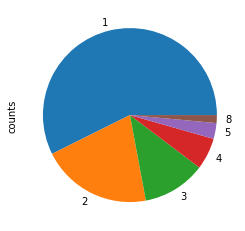

In [33]:
playground_count = playground_data['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
playground_count["counts"].value_counts().sort_index().plot.pie(y='counts', subplots=False, figsize=(8, 4))

#### Bar Graph

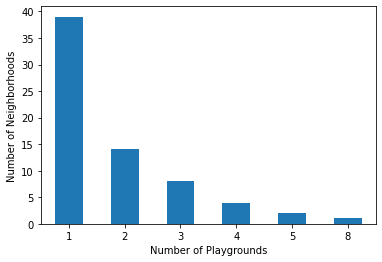

In [34]:
playground_count["counts"].value_counts().sort_index().plot(kind='bar', rot=0, xlabel = "Number of Playgrounds", ylabel = "Number of Neighborhoods")

#### Map

In [4]:
# import dataset
playgrounds = pd.read_csv("Playground Count.csv")
# filter to important info
playgrounds_data = playgrounds.groupby("Neighborhood").sum()['Number of Playgrounds']
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
playground_map = neighborhoods.merge(playgrounds_data, how='left', left_on='hood', right_on='Neighborhood')
playground_map.plot(column='Number of Playgrounds', # set the data to be used for coloring
               cmap='YlGnBu',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
                    
               missing_kwds={"color": "lightgrey"} # set districts with no data to gray
               )

FileNotFoundError: [Errno 2] No such file or directory: 'Playground Count.csv'

No data recorded/No playgrounds for:

Chartiers City, Ridgemont, Overbrook, Knoxville, South Shore, Mt. Oliver, St. Clair, Arlington, Arlington Heights, Glen Hazel, Point Breeze, 
Homewood South, East Hills, Friendship, North Oakland, Central Business District, North Shore, Allegheny West, Chateau, California Kirkbride,
Northview Heights, and Summer Hill

### Ranking
***

In [64]:
playground_df = playground_data['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
playground_df_index = playground_df.reset_index().set_index('index', drop=False)
playground_df_index = playground_df_index.rename(columns={'index':'playground_rank'})[['playground_rank', 'neighborhood']]
playground_df_index.head(5)

,playground_rank,neighborhood
index,,
0,0,Squirrel Hill South
1,1,Beechview
2,2,South Side Slopes
3,3,Highland Park
4,4,Sheraden


### Squirrel Hill South is the winner for this metric!
***

## Schools
***

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [4]:
schools = pd.read_csv("School-Data/neighborhood_enrollment.csv")

In [5]:
drop = schools.fillna(value = 0)

Change any total_students_enrolled with no value to just 0

In [6]:
students = drop[["neighborhood", "total_students_enrolled", "grade_level"]]

Create new dataset with just neighborhood, total_students_enrolled, and grade_level columns only

In [7]:
high = students.sort_values("total_students_enrolled", ascending=False)

Use sort_values function on students dataset and make it go by descending order for total_students_enrolled

In [8]:
high.groupby("grade_level").head().sort_values(["grade_level", "total_students_enrolled"],ascending=False)

,neighborhood,total_students_enrolled,grade_level
15,Carrick,64.0,Pre-K
70,Sheraden,58.0,Pre-K
13,Brookline,57.0,Pre-K
41,Homewood South,46.0,Pre-K
26,East Hills,44.0,Pre-K
107,Carrick,541.0,K-5
105,Brookline,526.0,K-5
99,Beechview,339.0,K-5
104,Brighton Heights,296.0,K-5
168,Squirrel Hill South,286.0,K-5


Use groupby on high dataset to group by grade level and sort values on both grade level and total students enrolled, and taking the head to display the five most students enrollment for each grade level

In [9]:
neighborhoods = geopandas.read_file("School-Data/Neighborhoods_.shx")

Read in map of Pittsburgh neighborhoods for later

In [10]:
students_bar=students.pivot(index="neighborhood", columns="grade_level", values="total_students_enrolled").drop(labels=0)
students_bar.head()

grade_level,6-8,9-12,K-5,Pre-K
neighborhood,,,,
Allegheny Center,23.0,18.0,39.0,0.0
Allegheny West,0.0,0.0,0.0,0.0
Allentown,84.0,67.0,133.0,0.0
Arlington,49.0,60.0,74.0,0.0
Arlington Heights,0.0,0.0,21.0,0.0


Pivoted data for later use with bar graphs

In [11]:
students_bar["total"] = 0
students_bar["total"] = students_bar.sum(axis=1)
students_bar.head()

grade_level,6-8,9-12,K-5,Pre-K,total
neighborhood,,,,,
Allegheny Center,23.0,18.0,39.0,0.0,80.0
Allegheny West,0.0,0.0,0.0,0.0,0.0
Allentown,84.0,67.0,133.0,0.0,284.0
Arlington,49.0,60.0,74.0,0.0,183.0
Arlington Heights,0.0,0.0,21.0,0.0,21.0


Added total column in pivoted data with sum of all students enrolled for each grade level for every neighborhood.

In [12]:
sort_enroll = students_bar.sort_values("total")
sort_enroll.tail()

grade_level,6-8,9-12,K-5,Pre-K,total
neighborhood,,,,,
Squirrel Hill South,115.0,249.0,286.0,29.0,679.0
Sheraden,156.0,205.0,275.0,58.0,694.0
Beechview,196.0,215.0,339.0,44.0,794.0
Brookline,276.0,310.0,526.0,57.0,1169.0
Carrick,293.0,378.0,541.0,64.0,1276.0


Sorted the total column of all students enrolled to get into ascending order, took tail to get last five neighborhoods with most students enrolled.

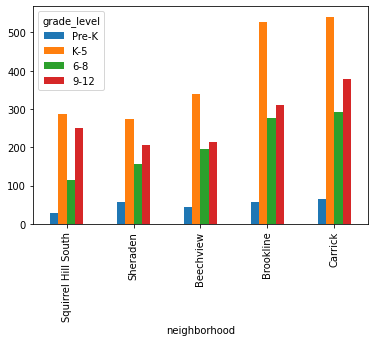

In [13]:
sort_enroll[["Pre-K", "K-5", "6-8", "9-12"]].tail().plot(kind="bar")

Bar graph showing the total students enrolled for the five most enrolled neighborhoods, showing the grade level of each in color

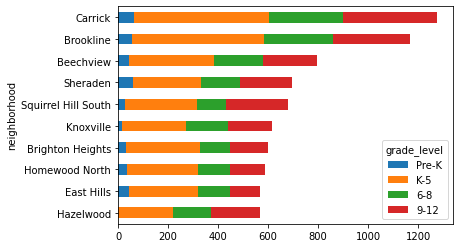

In [14]:
sort_enroll[["Pre-K", "K-5", "6-8", "9-12"]].tail(10).plot.barh(stacked=True, rot=0)

Horizontal bar graph showing the top ten most enrolled students neighborhoods, where the grade levels are all stacked on each other

In [15]:
enroll_map = neighborhoods.merge(sort_enroll, how="left", left_on="hood", right_on="neighborhood")
enroll_map[["hood", "total"]].head()

,hood,total
0,Chateau,0.0
1,Summer Hill,41.0
2,Northview Heights,527.0
3,Spring Hill-City View,239.0
4,Perry South,443.0


Creating map by merging neighborhoods data with student enrollment, in this case the total number of students enrolled for each neighborhood

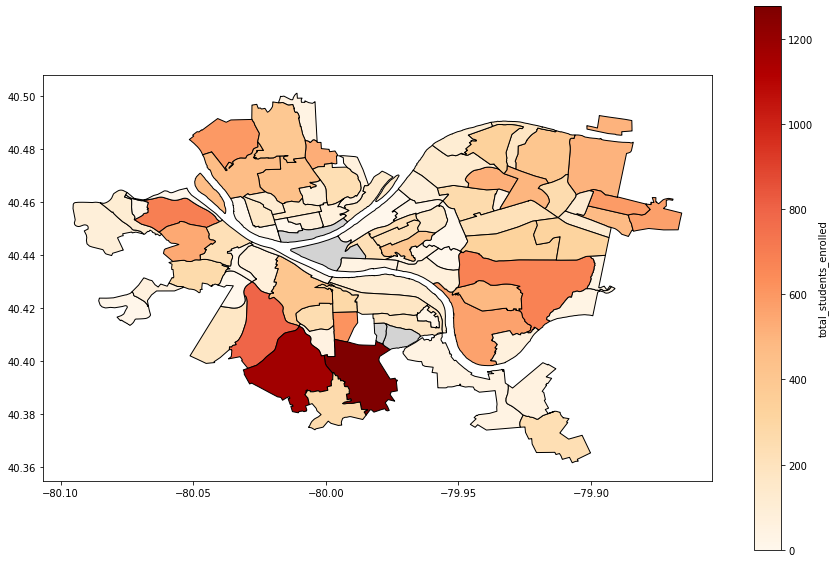

In [16]:
enroll_map.plot(column="total", cmap="OrRd", edgecolor="black", legend=True, 
legend_kwds={"label": "total_students_enrolled"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

Map of Pittsburgh neighborhoods color coded to be more darker red the more students there are enrolled in a neighborhood

In [17]:
column = "total"
sort_enroll[column] = sort_enroll[column] / sort_enroll[column].max()
sort_enroll[column].tail(10)

neighborhood
Hazelwood              0.444357
East Hills             0.445925
Homewood North         0.461599
Brighton Heights       0.468652
Knoxville              0.482759
Squirrel Hill South    0.532132
Sheraden               0.543887
Beechview              0.622257
Brookline              0.916144
Carrick                1.000000
Name: total, dtype: float64

Normalized the total column for student enrollment to be between 0-1, more students enrolled will be closer to 1 value, took tail on data to get ten highest enrolled neighborhoods

## **Carrick is the winner for this submetric!**

# Conclusion
***

Individual Conclusions:

Steven Johns
***

Rhythm Desai
***
For my metric, I determined that Squirrel Hill South stood as the best neighborhood in Pittsburgh. Compared to other neighborhoods, Squirrel Hill South held the most playgrounds with a total count of 8. The subsequent highest was tied between Beechview and South Side Slopes with a total of 5 playgrounds, making the leap between first and second place quite considerable. With Squirrel Hill South being one of the largest Pittsbugh neighbohoods, it came as no surprise that it would be abundant with playgrounds and therefore quite suitable for starting a family in.

Summit Dang
***

For my metric, I determined Carrick to be the best neighborhood in PIttsburgh. Carrick was the neighborhood that had the most total students enrolled, taking into account of all students enrolled for each grade level combined. When normalizing the dataset, I found Carrick to still have the highest value of 1, as it had the highest total number of students enrolled, and made sense at that is what I am dividing every single neighborhood's total student enrollment by, it would come as now suprise that Carrick would lead with a value of 1.